In [1]:
import pandas as pd
import numpy as np

# Real property tax is calculated according to the fair market value of the real estate

# Tax is accessed as a percentage of the amount for which the owner would be able to sell

# RPT will increase when the property is bullish and decline when bearish

In [2]:
df = pd.read_csv('Real_Property_Taxes.csv')

# Nothing too interesting in the head or tail.
# I'm seeing plenty of NaN values in the numerical columns
# LotSize looks like it will be a mess

In [3]:
df.head(10)

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,7129028,7129,028,25,60,3922 6TH ST,15X119-10,"1,317.33",65.63,PRINCIPAL RESIDENCE,651.50,12/31/2018,Brooklyn,Southern,10.0,"(39.23216993, -76.60422563)"
1,0001002,0001,002,15,370,2043 W NORTH AVE,14X83-10,"1,112.76",55.44,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941619, -76.65109034)"
2,0001004,0001,004,15,370,2039 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941951, -76.65099026)"
3,0001005,0001,005,15,370,2037 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942111, -76.65094166)"
4,0001006,0001,006,15,370,2035 W NORTH AVE,14X83-10,247.28,12.32,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942277, -76.65089166)"
5,7129031,7129,031,25,60,3914 6TH ST,20X120-4,"1,348.80",67.20,PRINCIPAL RESIDENCE,666.60,12/31/2018,Brooklyn,Southern,10.0,"(39.23235197, -76.60434791)"
6,4179P033,4179P,033,26,340,3811 LYNDALE AVE,14X100,"2,032.19",101.25,NOT A PRINCIPAL RESIDENCE,"2,123.28",07/01/2018,Belair-Edison,Notheastern,13.0,"(39.31680208, -76.56505749)"
7,0001009,0001,009,15,370,2029 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942756, -76.65074605)"
8,0001010,0001,010,15,370,2027 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942925, -76.65069531)"
9,0001011,0001,011,15,370,2025 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30943089, -76.65064581)"


In [4]:
df.tail(10)

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
238586,4203018,4203,018,27,220,3224 SHELBURNE ROAD,50X101-7,"7,386.93",368.03,PRINCIPAL RESIDENCE,"7,149.38",07/01/2018,Cross Country,Northwestern,5.0,"(39.37182336, -76.70236543)"
238587,4203030B,4203,030B,27,220,3319 SHELBURNE ROAD,50X122-7,"4,520.73",225.23,PRINCIPAL RESIDENCE,NaN,07/01/2018,Cross Country,Northwestern,5.0,"(39.37136636, -76.7046123)"
238588,4203030C,4203,030C,27,220,3317 SHELBURNE ROAD,50X123-1,NaN,NaN,PRINCIPAL RESIDENCE,268.90,06/30/2018,Cross Country,Northwestern,5.0,"(39.37136999, -76.7044314)"
238589,4203037,4203,037,27,220,3303 SHELBURNE ROAD,50X126-8,"5,008.54",249.54,PRINCIPAL RESIDENCE,"4,674.97",07/01/2018,Cross Country,Northwestern,5.0,"(39.37138835, -76.70319233)"
238590,4203039,4203,039,27,220,3229 SHELBURNE ROAD,50X127-7,"5,570.54",277.54,PRINCIPAL RESIDENCE,"3,486.31",07/01/2018,Cross Country,Northwestern,5.0,"(39.37139497, -76.70270492)"
238591,4203041,4203,041,27,220,3225 SHELBURNE ROAD,50X129-1,"4,925.37",245.39,NOT A PRINCIPAL RESIDENCE,"5,146.13",07/01/2018,Cross Country,Northwestern,5.0,"(39.37140057, -76.70234186)"
238592,4203044,4203,044,27,220,3219 SHELBURNE ROAD,57-11X130-9,"6,436.02",320.66,PRINCIPAL RESIDENCE,"4,471.36",12/01/2018,Cross Country,Northwestern,5.0,"(39.37140848, -76.70179725)"
238593,4203045,4203,045,27,220,3217 SHELBURNE ROAD,57-11X131-4,"6,069.60",302.40,PRINCIPAL RESIDENCE,"4,570.90",07/01/2018,Cross Country,Northwestern,5.0,"(39.37141104, -76.70159253)"
238594,4203040,4203,040,27,220,3227 SHELBURNE ROAD,50X128-7,"4,745.53",236.43,PRINCIPAL RESIDENCE,"1,608.60",12/31/2018,Cross Country,Northwestern,5.0,"(39.37139808, -76.70251871)"
238595,4203042,4203,042,27,220,3223 SHELBURNE ROAD,50X129-7,"4,945.60",246.40,PRINCIPAL RESIDENCE,"2,237.66",12/31/2018,Cross Country,Northwestern,5.0,"(39.37140333, -76.70216499)"


# PropertyID is a unique identifier. If we were using this to join another dataset with PropertyID it would be useful. 

# For our use, I do not see a use for it

In [5]:
df.drop('PropertyID', axis=1, inplace=True)

# Similarly - unless we have street names to compare. I don't see this being useful

In [6]:
df.drop('PropertyAddress', axis=1, inplace=True)

# For PoliceDistrict/CouncilDistrict/Location
# We are using Neighborhood to link our databases
# These are similar attributes but serve no purpose to us

In [7]:
df.drop('PoliceDistrict', axis=1, inplace=True)

In [8]:
df.drop('CouncilDistrict', axis=1, inplace=True)

In [9]:
df.drop('Location', axis=1, inplace=True)

# Seems much easier to look at now. 
# Let's look closer at a few columns

In [10]:
df.head()

,Block,Lot,Ward,Sect,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood
0,7129,028,25,60,15X119-10,"1,317.33",65.63,PRINCIPAL RESIDENCE,651.50,12/31/2018,Brooklyn
1,0001,002,15,370,14X83-10,"1,112.76",55.44,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood
2,0001,004,15,370,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood
3,0001,005,15,370,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood
4,0001,006,15,370,14X83-10,247.28,12.32,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood


# So it's either a primary resience or it isn't
# Makes sense. I'm going to rename this so it isn't as much of an eye sore

In [11]:
df['ResCode'].value_counts()

NOT A PRINCIPAL RESIDENCE    124359
PRINCIPAL RESIDENCE          114237
Name: ResCode, dtype: int64

# Apparently, there is a ton of spaces afer Princpal Residence. No idea why

In [12]:
df['ResCode'] = df['ResCode'].replace(['PRINCIPAL RESIDENCE      ', 'NOT A PRINCIPAL RESIDENCE'], ['Y','N'])

In [13]:
df['ResCode'].value_counts()

N    124359
Y    114237
Name: ResCode, dtype: int64

# Creating a new column named PrinRes

In [14]:
df['PrinRes'] = df['ResCode']

In [15]:
df.drop('ResCode', axis=1, inplace=True)

# Easier to read. Plus we can change to 0 and 1 if we need numeric values

In [16]:
df.head(5)

,Block,Lot,Ward,Sect,LotSize,CityTax,StateTax,AmountDue,AsOfDate,Neighborhood,PrinRes
0,7129,028,25,60,15X119-10,"1,317.33",65.63,651.50,12/31/2018,Brooklyn,Y
1,0001,002,15,370,14X83-10,"1,112.76",55.44,NaN,06/04/2018,Easterwood,N
2,0001,004,15,370,14X83-10,472.08,23.52,NaN,06/04/2018,Easterwood,N
3,0001,005,15,370,14X83-10,472.08,23.52,NaN,06/04/2018,Easterwood,N
4,0001,006,15,370,14X83-10,247.28,12.32,NaN,06/04/2018,Easterwood,N


# I haven't checked for duplicates. But it doesn't look like there are any so that's good

In [17]:
len(df) - len(df.drop_duplicates())

0

# Lot Size is a mess. Too much of a mess - we can use the Tax to classify how big or small a lot is

# In a separate file, I spent a good 2 hours trying to fix LotSize. I ended up just deleting everything and starting over.

In [18]:
df.drop('LotSize', axis=1, inplace=True)

# Looking cleaner. I should look into what Block/Lot/Ward/Sect are. They sound very similar. And I'm noticing that Neighborhoods have the same Sect and Ward

In [19]:
df.head(5)

,Block,Lot,Ward,Sect,CityTax,StateTax,AmountDue,AsOfDate,Neighborhood,PrinRes
0,7129,028,25,60,"1,317.33",65.63,651.50,12/31/2018,Brooklyn,Y
1,0001,002,15,370,"1,112.76",55.44,NaN,06/04/2018,Easterwood,N
2,0001,004,15,370,472.08,23.52,NaN,06/04/2018,Easterwood,N
3,0001,005,15,370,472.08,23.52,NaN,06/04/2018,Easterwood,N
4,0001,006,15,370,247.28,12.32,NaN,06/04/2018,Easterwood,N


# After googling, Wards are pretty much districts. if we're going off of neighborhood then we don't need this

In [20]:
df.drop('Ward', axis=1, inplace=True)

In [21]:
df.head(5)

,Block,Lot,Sect,CityTax,StateTax,AmountDue,AsOfDate,Neighborhood,PrinRes
0,7129,028,60,"1,317.33",65.63,651.50,12/31/2018,Brooklyn,Y
1,0001,002,370,"1,112.76",55.44,NaN,06/04/2018,Easterwood,N
2,0001,004,370,472.08,23.52,NaN,06/04/2018,Easterwood,N
3,0001,005,370,472.08,23.52,NaN,06/04/2018,Easterwood,N
4,0001,006,370,247.28,12.32,NaN,06/04/2018,Easterwood,N


# Sect is just a more broad version of neighboorhod. Again, if we're using neighborhoods then we do not need Sect. It's less specific

In [22]:
df['Sect'].nunique()

66

In [23]:
df['Neighborhood'].nunique()

278

In [24]:
df.drop('Sect', axis=1, inplace=True)

In [25]:
df.head(5)

,Block,Lot,CityTax,StateTax,AmountDue,AsOfDate,Neighborhood,PrinRes
0,7129,028,"1,317.33",65.63,651.50,12/31/2018,Brooklyn,Y
1,0001,002,"1,112.76",55.44,NaN,06/04/2018,Easterwood,N
2,0001,004,472.08,23.52,NaN,06/04/2018,Easterwood,N
3,0001,005,472.08,23.52,NaN,06/04/2018,Easterwood,N
4,0001,006,247.28,12.32,NaN,06/04/2018,Easterwood,N


# What are lots? Like land plots?

In [26]:
df['Lot'].nunique()

3068

# These appear to be Lots on a certain block. On cityservices.baltimorecity.gov/realproperty you can find any of these houses simply based on their block and lot

In [27]:
df['Lot'].value_counts()

001     5552
005     4254
004     4224
003     4211
006     4208
007     4198
008     4124
009     4097
002     4072
011     3990
010     3984
012     3923
013     3886
014     3793
015     3767
016     3679
017     3634
018     3508
019     3449
020     3369
021     3301
022     3231
023     3162
024     3122
025     3061
026     3008
027     2932
028     2856
029     2809
030     2766
        ... 
144B       1
530C       1
060M       1
708B       1
060G       1
038K       1
167E       1
228C       1
401H       1
452I       1
515J       1
412R       1
027Q       1
005S       1
530E       1
166P       1
135K       1
515S       1
013K       1
007U       1
270E       1
029Q       1
076F       1
898        1
270O       1
944        1
063F       1
205I       1
101F       1
164B       1
Name: Lot, Length: 3068, dtype: int64

# What are blocks? Like street blocks?

In [28]:
df['Block'].nunique()

5558

# After doing some research - these appear to be identifiers for the blocks in baltimore. I don't think they will be of much help to us.

In [29]:
df['Block'].value_counts()

5387     982
5138A    928
5267O    839
6190     837
4778E    809
1922     776
6172     701
5237     674
2530C    623
3695A    458
2024     444
1404     444
7492C    416
5555     407
3702     374
3970F    369
5237B    365
1799A    357
7993A    343
7654G    337
1350     330
5210D    329
4293     329
0484     328
5267J    325
0966     315
4179S    314
0501     314
1874     308
2281     303
        ... 
5140O      1
2471       1
0535       1
7462       1
1417       1
0973       1
3100C      1
3604       1
7992       1
0230       1
1872       1
3068       1
1888       1
1236       1
0841       1
1582       1
1306D      1
6607G      1
0678       1
1393       1
1185       1
7805C      1
1187       1
0457       1
1634       1
4031       1
7612M      1
0853       1
0529       1
2530B      1
Name: Block, Length: 5558, dtype: int64

In [30]:
df.drop('Block', axis=1, inplace=True)

In [31]:
df.drop('Lot', axis=1, inplace=True)

In [32]:
df.columns

Index(['CityTax', 'StateTax', 'AmountDue', 'AsOfDate', 'Neighborhood',
       'PrinRes'],
      dtype='object')

# Let's look at the columns that we have left. Starting with CityTax and StateTax

In [33]:
df['CityTax'].value_counts()

674.40        4160
337.20        4081
562.00        3687
22.48         2932
809.28        2609
1,126.25      2233
67.44         2005
112.40        1868
472.08        1709
382.16        1665
651.92        1573
1,348.80      1460
89.92         1446
854.24         880
269.76         860
97.41          849
899.20         802
82.43          794
1,686.00       751
764.32         722
427.12         720
1,573.60       684
229.30         618
1,011.60       575
606.96         572
689.39         569
292.24         546
824.27         530
179.84         526
539.52         508
              ... 
27,588.20        1
792.80           1
13,517.22        1
44,342.70        1
35,408.92        1
10,800.90        1
8,077.81         1
141,249.33       1
7,048.99         1
2,368.49         1
61,637.91        1
9,024.98         1
8,065.08         1
13,770.51        1
12,445.67        1
18,622.43        1
14,062.75        1
8,343.83         1
22,255.20        1
8,745.46         1
22,527.21        1
13,915.12   

In [34]:
df['StateTax'].value_counts()

33.60        4160
16.80        4081
28.00        3687
1.12         2932
40.32        2622
56.11        2233
3.36         2005
5.60         1868
23.52        1709
19.04        1665
32.48        1573
67.20        1460
4.48         1446
42.56         880
13.44         860
4.85          850
44.80         802
4.11          794
84.00         751
38.08         722
21.28         720
78.40         684
11.42         618
50.40         575
30.24         572
34.35         569
14.56         546
41.07         530
8.96          526
26.88         508
             ... 
2,156.71        1
1,680.00        1
461.85          1
809.54          1
3,529.12        1
1,131.16        1
491.16          1
892.08          1
728.48          1
492.16          1
452.85          1
937.63          1
2,250.42        1
4,026.55        1
497.62          1
14,444.08       1
425.56          1
2,483.26        1
494.78          1
3,191.10        1
1,569.76        1
687.42          1
737.30          1
4,011.39        1
2,796.42  

# Seems fine, hard to call any of these outliers when it's the a tax amount. AmountDue next

In [35]:
df['AmountDue'].value_counts()

26.82        1577
80.46         617
38.24         479
91.88         448
107.28        426
134.17        413
145.59        378
118.70        374
116.26        356
109.79        332
1,176.73      320
681.14        316
98.37         272
587.19        262
127.68        254
402.37        252
704.63        233
590.00        230
413.79        218
555.94        211
845.55        208
892.53        187
682.06        175
152.01        175
399.29        171
1,182.36      166
10.00         162
684.40        158
545.35        150
662.77        150
             ... 
1,470.53        1
4,667.60        1
2,862.17        1
4,253.97        1
3,300.52        1
3,870.71        1
8,287.56        1
612.07          1
1,090.12        1
2,964.66        1
2,920.76        1
1,241.61        1
181.85          1
5,432.85        1
813.32          1
12,995.69       1
4,541.41        1
2,266.18        1
5,194.68        1
11,198.42       1
12,137.56       1
544.91          1
26.77           1
2,402.66        1
1,381.75  

# Same thing. Big and Small numbers make sense. We would have to visualize this to determine if there are any outliers

# AsOfDate seems fine. We could calculate this to age if need be

In [36]:
df['AsOfDate'].value_counts()

06/04/2018    95635
07/01/2018    33577
12/31/2018    30507
07/31/2018    15012
03/30/2019    11814
09/29/2018    11300
04/08/2019    10512
09/28/2018     9860
02/02/2019     2385
02/28/2019     2208
10/31/2018     2116
12/01/2018     1959
01/31/2019      431
11/30/2018      404
03/25/2019      328
10/02/2018      284
07/03/2018      277
10/01/2018      198
02/26/2019      174
07/11/2018      166
03/23/2019      165
12/19/2018      161
10/16/2018      155
03/04/2019      152
08/27/2018      147
02/04/2019      147
06/14/2018      139
11/08/2018      135
04/19/2019      132
12/04/2018      128
              ...  
09/18/2018       12
10/19/2018       11
08/31/2018       11
09/13/2018       11
03/13/2019       11
03/21/2019       10
07/12/2018        9
06/09/2018        9
03/14/2019        9
07/28/2018        8
07/21/2018        8
10/26/2018        8
03/20/2019        7
11/27/2018        6
08/04/2018        6
06/16/2018        6
09/20/2018        6
07/26/2018        6
07/13/2018        5


# Many Neighborhoods are NaN. We could use Block/Lot/Etc to determine what neighborhood they are in - but I don't know if there is a dataset to compare them too

In [37]:
df['Neighborhood'].value_counts()

Belair-Edison                      6345
Canton                             6030
Frankford                          4177
Broadway East                      3858
Sandtown-Winchester                3848
Hampden                            3376
Brooklyn                           3144
Coldstream Homestead Montebello    3105
Riverside                          2888
Central Park Heights               2859
Washington Village/Pigtown         2845
Oliver                             2597
Waltherson                         2573
Hamilton Hills                     2482
Patterson Park Neighborhood        2454
Carrollton Ridge                   2294
North Harford Road                 2232
Glenham-Belhar                     2222
Howard Park                        2109
Harlem Park                        1965
Ednor Gardens-Lakeside             1951
Upton                              1936
Morrell Park                       1933
Upper Fells Point                  1910
Glen                               1832


# We already know PrinRes is nice looking

In [38]:
df['PrinRes'].value_counts()

N    124359
Y    114237
Name: PrinRes, dtype: int64

In [39]:
df.head()

,CityTax,StateTax,AmountDue,AsOfDate,Neighborhood,PrinRes
0,"1,317.33",65.63,651.50,12/31/2018,Brooklyn,Y
1,"1,112.76",55.44,NaN,06/04/2018,Easterwood,N
2,472.08,23.52,NaN,06/04/2018,Easterwood,N
3,472.08,23.52,NaN,06/04/2018,Easterwood,N
4,247.28,12.32,NaN,06/04/2018,Easterwood,N


# I want to convert things to numberic values so that I can visualize things.

In [40]:
df['CityTax'].dtype

dtype('O')

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#df_new = df.infer_objects

In [43]:
#df_new = df[0:]

In [44]:
#df_new.head()

In [45]:
#df_new['CityTax'].dtype

In [46]:
#pd.to_numeric(df['CityTax'], errors = 'coerce')

In [47]:
#pd.to_numeric(df['AmountDue'], errors = 'coerce')

In [48]:
#df['CityTax'].dtype

# Working on converting things to numeric in order to visualize

# This works? But it also didn't when I tried to plot them

In [49]:
df.convert_objects(convert_numeric=True).dtypes

C:\Users\Delta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


CityTax         float64
StateTax        float64
AmountDue       float64
AsOfDate         object
Neighborhood     object
PrinRes          object
dtype: object

# Still says type object

In [50]:
df['CityTax']

0          1,317.33
1          1,112.76
2            472.08
3            472.08
4            247.28
5          1,348.80
6          2,032.19
7            472.08
8            472.08
9            472.08
10           472.08
11           472.08
12              NaN
13           472.08
14           472.08
15           472.08
16           472.08
17           472.08
18           472.08
19           472.08
20           472.08
21         2,823.49
22           472.08
23         6,008.90
24              NaN
25         2,801.01
26         2,308.70
27         2,839.22
28           472.08
29           472.08
            ...    
238566     2,233.77
238567     1,840.37
238568     3,996.94
238569     3,868.81
238570     3,212.39
238571     3,372.00
238572     2,196.30
238573     2,675.12
238574     7,058.72
238575     2,812.25
238576    16,857.75
238577     3,273.09
238578     3,437.19
238579     4,612.90
238580     4,608.40
238581     4,325.15
238582     4,621.89
238583     4,747.78
238584     5,939.22


# This is what I wanted

In [51]:
#df['CityTax'] = pd.to_numeric(df['CityTax'])
#df['AmountDue'] = pd.to_numeric(df['AmountDue'])
df['CityTax'] = pd.to_numeric(df['CityTax'],errors='coerce')
df['AmountDue'] = pd.to_numeric(df['AmountDue'],errors='coerce')
df['StateTax'] = pd.to_numeric(df['StateTax'],errors='coerce')

# Much better

In [52]:
df['CityTax'].dtype

dtype('float64')

# Jokingly, I did City vs State tax

# But it's interesting that it's completely correlated
# My guess is that they use the same parameters in deciding how much something is worth, but take a different percentage

# which lines up as one is much less than the other

In [53]:
x = df['CityTax']
y = df['StateTax']

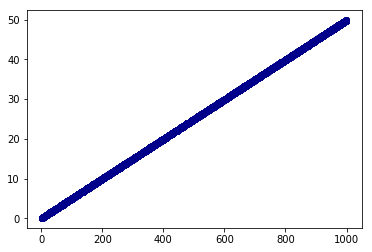

In [54]:
plt.scatter(x,y,c='DarkBlue')

# City Tax vs Amount Due

In [55]:
x = df['CityTax']
y = df['AmountDue']

# There is A LOT of clutter here
# We can see some outliers out above everything else
# Below the thick line, we can see some variation
# Let's get a closer look

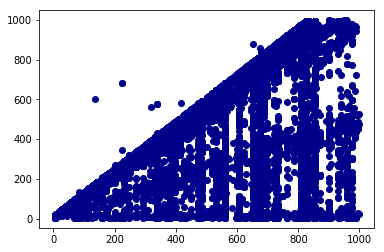

In [56]:
plt.scatter(x,y,c='DarkBlue')

# Limiting the y axis to 0-600
# We can see a positive correlation here. But also, no duh
# You get taxed more, you're likely to have more due
# Nothing groundbreaking here

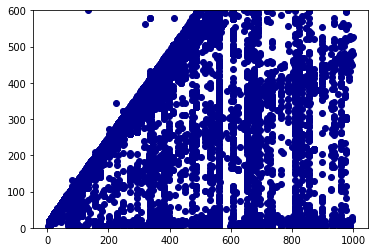

In [58]:
plt.ylim(0,600)
plt.scatter(x,y,c='DarkBlue')

In [59]:
df

,CityTax,StateTax,AmountDue,AsOfDate,Neighborhood,PrinRes
0,NaN,65.63,651.5,12/31/2018,Brooklyn,Y
1,NaN,55.44,NaN,06/04/2018,Easterwood,N
2,472.08,23.52,NaN,06/04/2018,Easterwood,N
3,472.08,23.52,NaN,06/04/2018,Easterwood,N
4,247.28,12.32,NaN,06/04/2018,Easterwood,N
5,NaN,67.20,666.6,12/31/2018,Brooklyn,Y
6,NaN,101.25,NaN,07/01/2018,Belair-Edison,N
7,472.08,23.52,NaN,06/04/2018,Easterwood,N
8,472.08,23.52,NaN,06/04/2018,Easterwood,N
9,472.08,23.52,NaN,06/04/2018,Easterwood,N
